In [22]:
import os
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

In [23]:
data_dir = os.getenv('DATA_DIR')
print (data_dir)

C:\cygwin\home\Griff\datathon2017\MelbDatathon2017


In [24]:
# Path to the data.  Forgive me for renaming everything!

fd_trans = os.path.join(data_dir, "Transactions", "patients_1.txt") # only look at one file for space reasons
print(fd_trans)

fd_atc = os.path.join(data_dir, "Lookups", "ATC_LookUp.txt")
print(fd_atc)

fd_ci = os.path.join(data_dir, "Lookups", "ChronicIllness_LookUp.txt")
print(fd_ci)

fd_drugs = os.path.join(data_dir, "Lookups", "Drug_LookUp.txt")
print(fd_drugs)

fd_patients = os.path.join(data_dir, "Lookups", "patients.txt")
print(fd_patients)

fd_stores = os.path.join(data_dir, "Lookups", "stores.txt")
print(fd_stores)


C:\cygwin\home\Griff\datathon2017\MelbDatathon2017\Transactions\patients_1.txt
C:\cygwin\home\Griff\datathon2017\MelbDatathon2017\Lookups\ATC_LookUp.txt
C:\cygwin\home\Griff\datathon2017\MelbDatathon2017\Lookups\ChronicIllness_LookUp.txt
C:\cygwin\home\Griff\datathon2017\MelbDatathon2017\Lookups\Drug_LookUp.txt
C:\cygwin\home\Griff\datathon2017\MelbDatathon2017\Lookups\patients.txt
C:\cygwin\home\Griff\datathon2017\MelbDatathon2017\Lookups\stores.txt


In [28]:
# Main dataframe, takes a bit of time to load.
trans_frame = pd.read_csv(fd_trans, sep = '\t', parse_dates = ['Dispense_Week'])

In [29]:
trans_frame.head()

,Patient_ID,Store_ID,Prescriber_ID,Drug_ID,SourceSystem_Code,Prescription_Week,Dispense_Week,Drug_Code,NHS_Code,IsDeferredScript,Script_Qty,Dispensed_Qty,MaxDispense_Qty,PatientPrice_Amt,WholeSalePrice_Amt,GovernmentReclaim_Amt,RepeatsTotal_Qty,RepeatsLeft_Qty,StreamlinedApproval_Code
0,1,2739,26728,8208,F,2010-08-15,2011-01-02,SPIR3,8626B,0,30,2,NaN,5.6,61.51,71.29,6,4,NaN
1,1,2739,26728,6085,F,2010-09-05,2011-01-23,NUEL1,8230E,0,100,2,NaN,5.6,4.80,6.56,6,4,NaN
2,1,2739,26728,763,F,2010-10-31,2011-01-23,ATAC1,8295N,0,30,2,NaN,5.6,10.73,13.65,6,4,NaN
3,1,2739,26728,6481,F,2011-01-02,2011-01-30,PANT14,8008L,0,60,2,NaN,5.6,42.24,47.56,6,4,NaN
4,1,2739,26728,8208,F,2010-08-15,2011-01-30,SPIR3,8626B,0,30,3,NaN,5.6,61.51,71.29,6,3,NaN


In [30]:
# All the lookup tables.
stores_frame = pd.read_csv(fd_stores, sep="\t")
patient_frame = pd.read_csv(fd_patients, sep="\t", na_values=1900) # Wise man!
drug_frame = pd.read_csv(fd_drugs, sep="\t")

In [31]:
# Looking for the number of unique element in each columns.

for col in trans_frame.columns:
    print(col, len(trans_frame[col].unique()))

NameError: name 'trans_frame' is not defined

In [70]:
patient_frame.head()

,Patient_ID,gender,year_of_birth,postcode
0,1.0,F,NaN,2516
1,2.0,F,1935.0,3042
2,3.0,M,NaN,4750
3,4.0,U,NaN,2765
4,5.0,U,NaN,2229


In [56]:
# Number of unique element in datas
for cl in patient_frame.columns:
    print(cl, len(patient_frame[cl].unique()))

Patient_ID 558352
gender 3
year_of_birth 95
postcode 2529


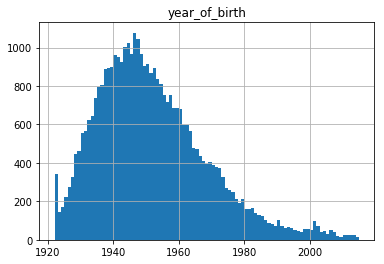

In [57]:
patient_frame.hist('year_of_birth', bins=93)
pl.show()

In [58]:
dgender = patient_frame.groupby('gender')

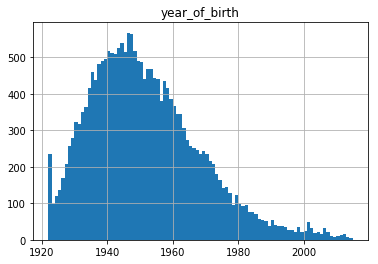

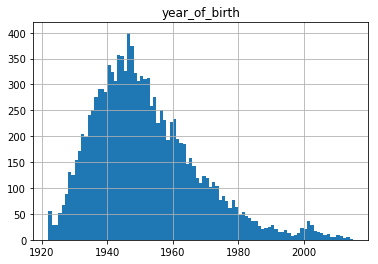

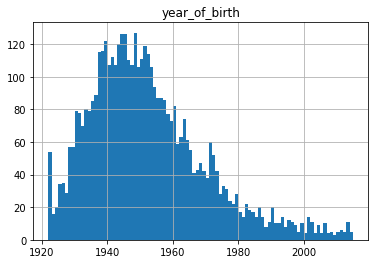

In [79]:
pl.figure()
dgender.hist('year_of_birth', bins=93)
pl.show()

In [75]:
patient_frame.groupby('gender').Patient_ID.count()

gender
F    257705
M    184550
U    116096
Name: Patient_ID, dtype: int64

In [80]:
megaframe = datafr.merge(patient_frame).merge(stores_frame)

In [83]:
megaframe.head()

,Patient_ID,Store_ID,Prescriber_ID,Drug_ID,SourceSystem_Code,Prescription_Week,Dispense_Week,Drug_Code,NHS_Code,IsDeferredScript,...,WholeSalePrice_Amt,GovernmentReclaim_Amt,RepeatsTotal_Qty,RepeatsLeft_Qty,StreamlinedApproval_Code,gender,year_of_birth,postcode,StateCode,IsBannerGroup
0,2,65,10206,3228,F,2010-12-05,2011-01-09,EZET1,8757X,0,...,58.68,65.37,6,4,NaN,F,1935.0,3042,VIC,0
1,2,65,10206,3228,F,2010-12-05,2011-02-13,EZET1,8757X,0,...,58.68,65.37,6,3,NaN,F,1935.0,3042,VIC,0
2,2,65,10206,3228,F,2010-12-05,2011-03-20,EZET1,8757X,0,...,58.68,65.37,6,2,NaN,F,1935.0,3042,VIC,0
3,2,65,10206,4540,F,2011-01-23,2011-03-20,KARV4,8404H,0,...,18.22,21.77,6,4,NaN,F,1935.0,3042,VIC,0
4,2,65,0,3863,F,2010-08-08,2011-04-17,GLYA1,2449X,0,...,5.86,7.56,6,3,NaN,F,1935.0,3042,VIC,0


In [99]:
state_sales_by_age = pd.pivot_table(megaframe, values='WholeSalePrice_Amt', index='year_of_birth', columns='StateCode', aggfunc=np.nanmean)

In [100]:
state_sales_by_age

StateCode,NSW,QLD,SA,TAS,VIC,WA
year_of_birth,,,,,,
1922.0,NaN,17.802793,NaN,NaN,23.008400,10.740800
1924.0,NaN,24.330878,NaN,NaN,NaN,22.529286
1925.0,NaN,5.987553,17.470769,NaN,NaN,19.940000
1926.0,NaN,16.858305,NaN,NaN,NaN,NaN
1927.0,17.438466,NaN,NaN,NaN,NaN,9.656353
1928.0,NaN,NaN,NaN,NaN,NaN,15.352842
1929.0,NaN,15.274809,NaN,NaN,NaN,NaN
1930.0,22.774881,14.509464,17.425413,NaN,NaN,24.358309
1931.0,21.023629,16.686867,NaN,NaN,14.549831,NaN


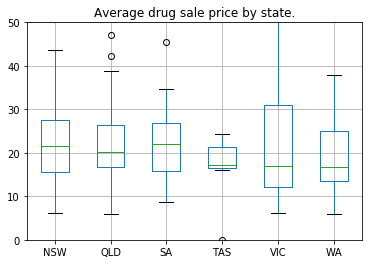

In [106]:
state_sales_by_age.boxplot()
pl.ylim((0, 50))
pl.title("Average drug sale price by state.")
pl.show()